# Máster en Big Data y Data Science

## Metodologías de gestión y diseño de proyectos big data

### AP2 - Modelado

#### Carga de Librerías

In [1]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, silhouette_score
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### Carga de Datos 
datos = pd.read_csv("/Users/christianvergararetamal/Desktop/Magister_24/13MBID/AP2/13MBID/data/final/datos_finales.csv", delimiter = ";")
datos.head()

,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,regla_duracion_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,2k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,C,P,1000,2,PROPIA,EDUCACIÓN,N,ok,ACTIVO,M,SECUNDARIO_COMPLETO,3.0
1,2k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,35000,2,ALQUILER,SALUD,N,ok,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,2k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,35000,4,ALQUILER,SALUD,Y,ok,ACTIVO,M,DESCONOCIDO,1.0
3,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,N,C,2500,2,PROPIA,INVERSIONES,N,ok,ACTIVO,F,SECUNDARIO_COMPLETO,4.0
4,menor_1k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,25_a_30,C,C,35000,3,ALQUILER,EDUCACIÓN,N,ok,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,3.0


#### Revisión de Metadatos 

In [4]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

gastos_ult_12m
limite_credito_tc
antiguedad_cliente
tasa_interes
ingresos
pct_ingreso
antiguedad_empleado
edad
estado_civil_N
estado_credito_N
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
regla_duracion_credito
estado_cliente
genero
nivel_educativo
personas_a_cargo

Cantidad de filas: 9765


#### División de la muestra

In [5]:
labels = datos.falta_pago.values

features = datos[['gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'tasa_interes', 'ingresos', 'pct_ingreso',
       'antiguedad_empleado', 'edad', 'importe_solicitado', 'duracion_credito',
       'situacion_vivienda', 'objetivo_credito', 'estado_civil_N',
       'estado_credito_N', 'estado_cliente', 'genero',
       'nivel_educativo', 'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_civil_N,estado_credito_N,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,2k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,1000,2,PROPIA,EDUCACIÓN,C,P,ACTIVO,M,SECUNDARIO_COMPLETO,3.0
1,2k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,5_a_10,menor_25,35000,2,ALQUILER,SALUD,C,C,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,2k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,35000,4,ALQUILER,SALUD,C,C,ACTIVO,M,DESCONOCIDO,1.0
3,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,2500,2,PROPIA,INVERSIONES,N,C,ACTIVO,F,SECUNDARIO_COMPLETO,4.0
4,menor_1k,3k_a_5k,menor_2y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,25_a_30,35000,3,ALQUILER,EDUCACIÓN,C,C,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,3.0


In [6]:
data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,personas_a_cargo,gastos_ult_12m_2k_a_4k,gastos_ult_12m_4k_a_6k,gastos_ult_12m_6k_a_8k,gastos_ult_12m_8k_a_10k,gastos_ult_12m_mayor_10k,gastos_ult_12m_menor_1k,limite_credito_tc_3k_a_5k,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,1000,2,3.0,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,35000,2,3.0,True,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,True,False
2,35000,4,1.0,True,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,False
3,2500,2,4.0,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,True,False,False
4,35000,3,3.0,False,False,False,False,False,True,True,...,True,False,False,True,False,False,False,False,False,True


In [7]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [8]:
# Division del set de datos en conjunto de entrenamiento y de prueba

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 


print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                          8000.0
duracion_credito                               4.0
personas_a_cargo                               2.0
gastos_ult_12m_2k_a_4k                       False
gastos_ult_12m_4k_a_6k                       False
gastos_ult_12m_6k_a_8k                        True
gastos_ult_12m_8k_a_10k                      False
gastos_ult_12m_mayor_10k                     False
gastos_ult_12m_menor_1k                      False
limite_credito_tc_3k_a_5k                    False
limite_credito_tc_5k_a_10k                    True
limite_credito_tc_mayor_10k                  False
limite_credito_tc_menor_3k                   False
antiguedad_cliente_2y_a_4y                    True
antiguedad_cliente_mayor_4y                  False
antiguedad_cliente_menor_2y                  False
tasa_interes_15p_a_20p                       False
tasa_interes_7p_a_15p                         True
tasa_interes_hasta_7p                        False


In [9]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    accuracy = accuracy_score(test_labels, prediction)
    precision = precision_score(test_labels, prediction, average='binary', zero_division=0)
    recall = recall_score(test_labels, prediction, average='binary', zero_division=0)
    f1 = f1_score(test_labels, prediction, average='binary', zero_division=0)
    
    ### roc auc 
    if len(np.unique(test_labels)) > 1:
        roc_auc = roc_auc_score(test_labels, prediction)
    else:
        roc_auc = np.nan  

    cm = confusion_matrix(test_labels, prediction)
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2,2) else (np.nan, np.nan, np.nan, np.nan)

    print("\n--- Evaluación del Modelo ---")
    print(f"Accuracy:   {accuracy:.4f}")
    print(f"Precision:  {precision:.4f}")
    print(f"Recall:     {recall:.4f}")
    print(f"F1 Score:   {f1:.4f}")
    print(f"ROC AUC:    {roc_auc:.4f}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    
    print("\nReporte de Indicadores:\n", classification_report(test_labels, prediction, zero_division=0))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap="Blues")
    plt.show()

In [10]:
from sklearn import set_config

set_config(print_changed_only=False)

#### Generación de Modelos

#### ZeroR (Modelo Base Comparativo)

In [11]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(random_state=1234)
clf.fit(train_data, train_labels)

DummyClassifier(constant=None, random_state=1234, strategy='prior')

In [12]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.8247338247338247
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


#### Experimentación MLFLOW

In [13]:

mlflow.set_experiment(experiment_name="Actividad Práctica 2")
mlflow.autolog()

2025/02/18 22:37:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Modelado implementación Vanila

In [14]:
## Codificación de etiquetas
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

##### Regresión Logística

In [15]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear')
    lreg.fit(train_data, train_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8784
Precision:  0.6944
Recall:     0.5467
F1 Score:   0.6118
ROC AUC:    0.7478
TN: 1911, FP: 103, FN: 194, TP: 234

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2014
           1       0.69      0.55      0.61       428

    accuracy                           0.88      2442
   macro avg       0.80      0.75      0.77      2442
weighted avg       0.87      0.88      0.87      2442



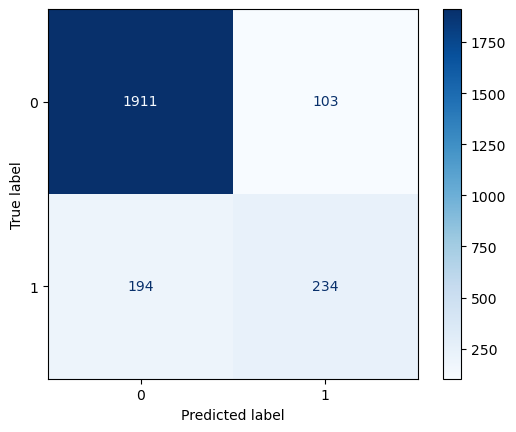

In [16]:
evaluar_modelo(lreg, test_data, test_labels_encoded)

##### KNN 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8247
Precision:  0.0000
Recall:     0.0000
F1 Score:   0.0000
ROC AUC:    0.5000
TN: 2014, FP: 0, FN: 428, TP: 0

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      2014
           1       0.00      0.00      0.00       428

    accuracy                           0.82      2442
   macro avg       0.41      0.50      0.45      2442
weighted avg       0.68      0.82      0.75      2442



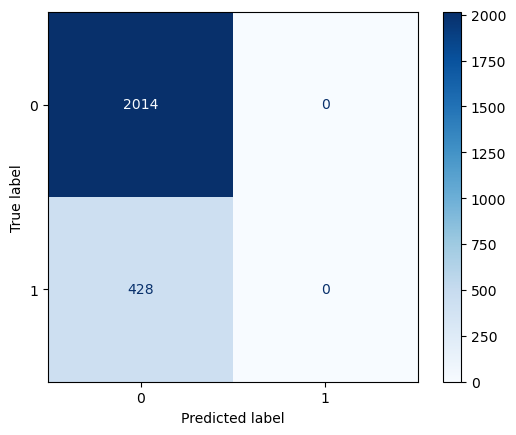

In [18]:
evaluar_modelo(knn, test_data, test_labels_encoded)

#### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8886
Precision:  0.7074
Recall:     0.6215
F1 Score:   0.6617
ROC AUC:    0.7834
TN: 1904, FP: 110, FN: 162, TP: 266

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2014
           1       0.71      0.62      0.66       428

    accuracy                           0.89      2442
   macro avg       0.81      0.78      0.80      2442
weighted avg       0.88      0.89      0.89      2442



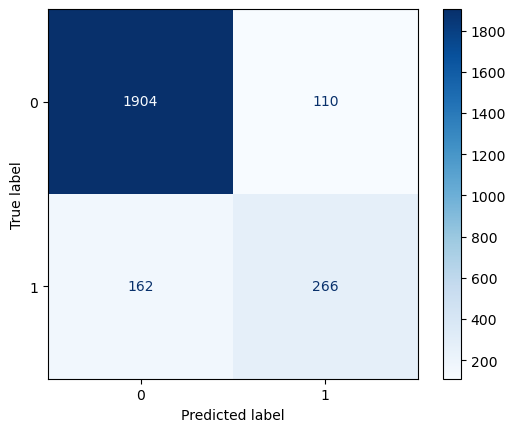

In [20]:
evaluar_modelo(dtc, test_data, test_labels_encoded)

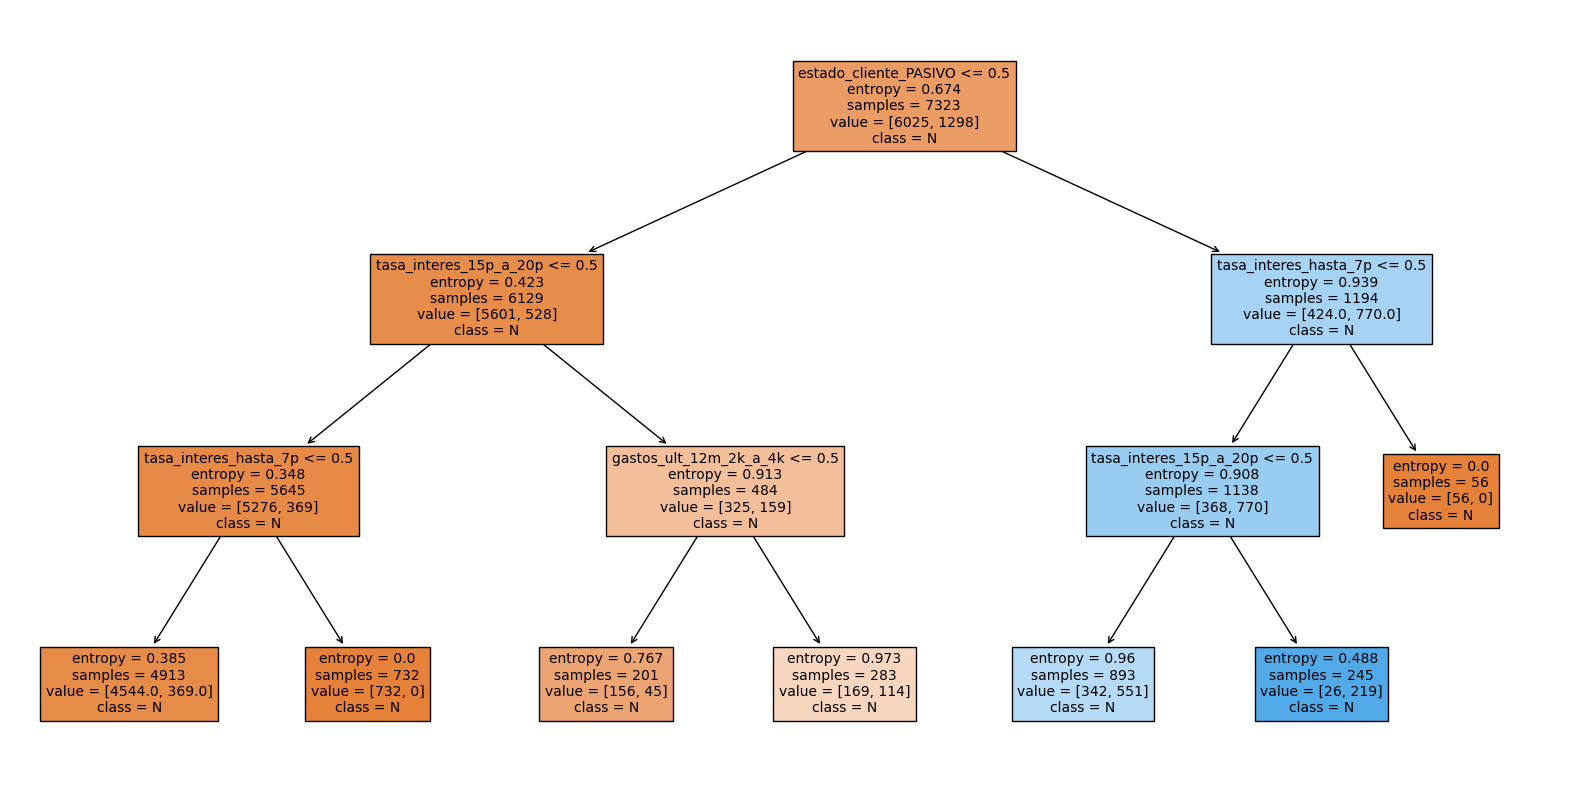

In [21]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

##### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10)
    rndf.fit(train_data, train_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8833
Precision:  0.7344
Recall:     0.5234
F1 Score:   0.6112
ROC AUC:    0.7416
TN: 1933, FP: 81, FN: 204, TP: 224

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      2014
           1       0.73      0.52      0.61       428

    accuracy                           0.88      2442
   macro avg       0.82      0.74      0.77      2442
weighted avg       0.87      0.88      0.88      2442



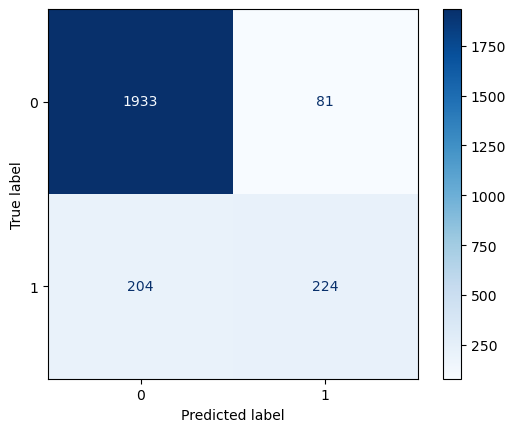

In [23]:
evaluar_modelo(rndf, test_data, test_labels_encoded)

##### Gradient Boosting 

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
with mlflow.start_run(run_name='Gradient Boosting'):
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    gbc.fit(train_data, train_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8841
Precision:  0.7114
Recall:     0.5701
F1 Score:   0.6329
ROC AUC:    0.7605
TN: 1915, FP: 99, FN: 184, TP: 244

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2014
           1       0.71      0.57      0.63       428

    accuracy                           0.88      2442
   macro avg       0.81      0.76      0.78      2442
weighted avg       0.88      0.88      0.88      2442



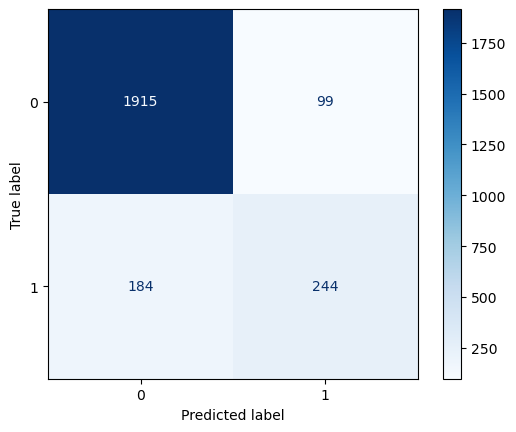

In [26]:
evaluar_modelo(gbc, test_data, test_labels_encoded)

##### XGBoost 

In [27]:
from xgboost import XGBClassifier

with mlflow.start_run(run_name='XGBoost'):
    xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(train_data, train_labels_encoded)

2025/02/18 22:38:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.



--- Evaluación del Modelo ---
Accuracy:   0.8853
Precision:  0.7079
Recall:     0.5888
F1 Score:   0.6429
ROC AUC:    0.7686
TN: 1910, FP: 104, FN: 176, TP: 252

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2014
           1       0.71      0.59      0.64       428

    accuracy                           0.89      2442
   macro avg       0.81      0.77      0.79      2442
weighted avg       0.88      0.89      0.88      2442



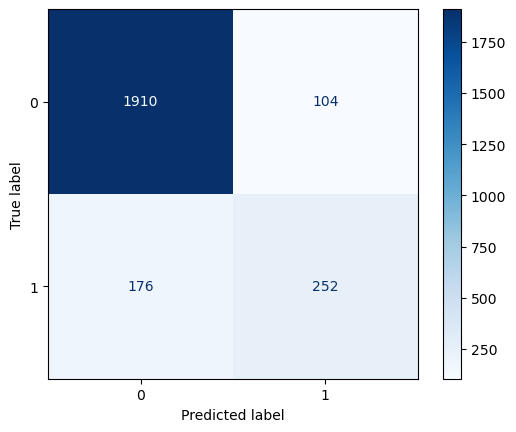

In [28]:
evaluar_modelo(xgb, test_data, test_labels_encoded)

##### SVM 

In [29]:
from sklearn.svm import SVC

with mlflow.start_run(run_name='SVM'):
    svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
    svm.fit(train_data, train_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8247
Precision:  0.0000
Recall:     0.0000
F1 Score:   0.0000
ROC AUC:    0.5000
TN: 2014, FP: 0, FN: 428, TP: 0

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      2014
           1       0.00      0.00      0.00       428

    accuracy                           0.82      2442
   macro avg       0.41      0.50      0.45      2442
weighted avg       0.68      0.82      0.75      2442



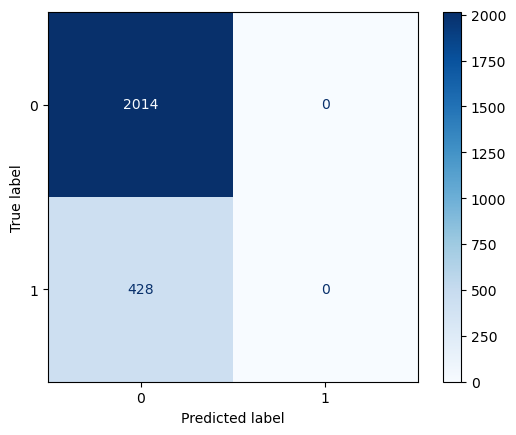

In [30]:
evaluar_modelo(svm, test_data, test_labels_encoded)

##### Redes Neuronales (MLP)

In [31]:
from sklearn.neural_network import MLPClassifier

with mlflow.start_run(run_name='Neural Network (MLP)'):
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=200)
    mlp.fit(train_data, train_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8268
Precision:  0.5926
Recall:     0.0374
F1 Score:   0.0703
ROC AUC:    0.5160
TN: 2003, FP: 11, FN: 412, TP: 16

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      2014
           1       0.59      0.04      0.07       428

    accuracy                           0.83      2442
   macro avg       0.71      0.52      0.49      2442
weighted avg       0.79      0.83      0.76      2442



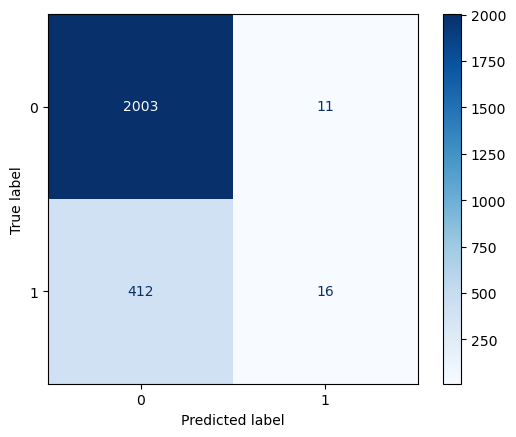

In [32]:
evaluar_modelo(mlp, test_data, test_labels_encoded)

#### Segunta etapa de Experimentación

##### 1. Optimización de hoiperparámetros de mejor modelo

In [33]:
from sklearn.model_selection import GridSearchCV # Busqueda de grilla

import mlflow
import mlflow.sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a optimizar
param_grid_dt = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"]
}

dt_model = DecisionTreeClassifier(random_state=1234)

# MLflow
with mlflow.start_run(run_name='Optimized Decision Tree'):
    
    # GridSearchCV con validación cruzada = 5 para vitar sobreajuste
    dt_model_gs = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='precision', n_jobs=-1)
    dt_model_gs.fit(train_data, train_labels_encoded)
    mejor_dt_model = dt_model_gs.best_estimator_
    
    # Registro con MLflow
    mlflow.log_params(dt_model_gs.best_params_)  
    mlflow.log_metric("precision", dt_model_gs.best_score_)  
    mlflow.sklearn.log_model(mejor_dt_model, "Best Decision Tree Model") 
    
    # Imprimir resultados
    print(f"Mejores Hiperparámetros: {dt_model_gs.best_params_}")
    print(f"Mejor Precisión: {dt_model_gs.best_score_:.4f}")


2025/02/18 22:38:43 INFO mlflow.sklearn.utils: Logging the 5 best runs, 251 runs will be omitted.
2025/02/18 22:38:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Mejores Hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}
Mejor Precisión: 0.7250



--- Evaluación del Modelo ---
Accuracy:   0.8698
Precision:  0.6910
Recall:     0.4650
F1 Score:   0.5559
ROC AUC:    0.7104
TN: 1925, FP: 89, FN: 229, TP: 199

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2014
           1       0.69      0.46      0.56       428

    accuracy                           0.87      2442
   macro avg       0.79      0.71      0.74      2442
weighted avg       0.86      0.87      0.86      2442



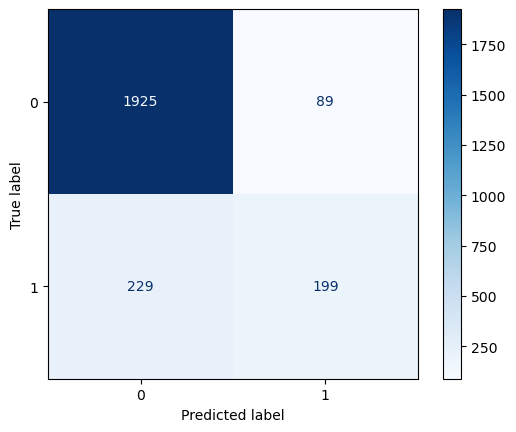

In [34]:
evaluar_modelo(mejor_dt_model, test_data, test_labels_encoded)

##### Ensembling Models 

In [35]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

### Definición de modelos base
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='entropy', random_state=1234)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=1234)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1234)


In [38]:
## Stacking

# evitar problemas de registro dupkicado
if mlflow.active_run():
    mlflow.end_run()
    
    
with mlflow.start_run(run_name='Stacking Classifier'):
    stacking_model = StackingClassifier(estimators=[('dt', dt), ('xgb', xgb), ('gb', gb)],
        final_estimator=LogisticRegression(solver='liblinear', random_state=1234),cv=5)
    
    stacking_model.fit(train_data, train_labels_encoded)
    stacking_acc = stacking_model.score(test_data, test_labels_encoded)
    # Evitar duplicados
    if "final_estimator" not in mlflow.active_run().data.params:
        mlflow.log_param("final_estimator", str(stacking_model.final_estimator_))
    
    
    mlflow.log_metric("accuracy", stacking_acc)
    mlflow.sklearn.log_model(stacking_model, "Stacking Model")
    print(f"Stacking Classifier Accuracy: {stacking_acc:.4f}")


# Voting soft

if mlflow.active_run():
    mlflow.end_run()
    
with mlflow.start_run(run_name='Voting Soft'):
    voting_model_soft = VotingClassifier(
        estimators=[('dt', dt), ('xgb', xgb), ('gb', gb)], voting='soft'
    )
    voting_model_soft.fit(train_data, train_labels_encoded)
    voting_soft_acc = voting_model_soft.score(test_data, test_labels_encoded)
    mlflow.log_params({"voting":"soft"})
    mlflow.log_metric("accuracy",voting_soft_acc)
    mlflow.sklearn.log_model(voting_model_soft,  "Voting Soft")
    print(f"Voting Classifier Soft Accuracy :{voting_soft_acc:.4f}")


##VOTING hard
if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name='Voting Hard'):
    voting_model_hard = VotingClassifier(
        estimators=[('dt', dt), ('xgb', xgb), ('gb', gb)],voting='hard')
    
    voting_model_hard.fit(train_data, train_labels_encoded)
    voting_hard_acc = voting_model_hard.score(test_data, test_labels_encoded)
    mlflow.log_params({"voting": "hard"})
    mlflow.log_metric("accuracy", voting_hard_acc)
    mlflow.sklearn.log_model(voting_model_hard, "Voting Hard")

    print(f"Voting Classifier Hard Accuracy: {voting_hard_acc:.4f}")

2025/02/18 22:42:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Stacking Classifier Accuracy: 0.8841


2025/02/18 22:42:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Voting Classifier Soft Accuracy :0.8837


2025/02/18 22:42:27 WARNING mlflow.sklearn.utils: RocCurveDisplay.from_estimator failed. The artifact training_roc_curve will not be recorded. Artifact error: VotingClassifier has none of the following attributes: predict_proba, decision_function.
2025/02/18 22:42:27 WARNING mlflow.sklearn.utils: PrecisionRecallDisplay.from_estimator failed. The artifact training_precision_recall_curve will not be recorded. Artifact error: VotingClassifier has none of the following attributes: predict_proba, decision_function.
2025/02/18 22:42:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Voting Classifier Hard Accuracy: 0.8849



--- Evaluación del Modelo ---
Accuracy:   0.8841
Precision:  0.7139
Recall:     0.5654
F1 Score:   0.6310
ROC AUC:    0.7586
TN: 1917, FP: 97, FN: 186, TP: 242

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      2014
           1       0.71      0.57      0.63       428

    accuracy                           0.88      2442
   macro avg       0.81      0.76      0.78      2442
weighted avg       0.88      0.88      0.88      2442



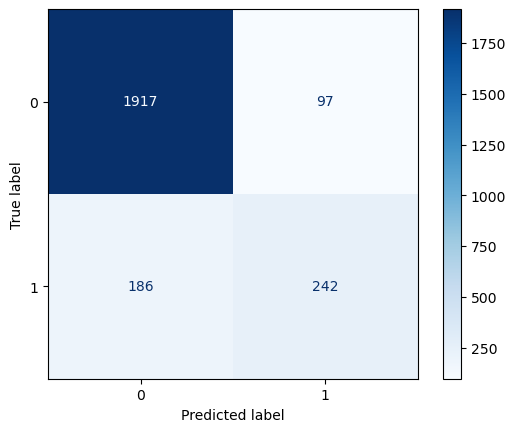

In [39]:
evaluar_modelo(stacking_model, test_data, test_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8837
Precision:  0.7000
Recall:     0.5888
F1 Score:   0.6396
ROC AUC:    0.7676
TN: 1906, FP: 108, FN: 176, TP: 252

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2014
           1       0.70      0.59      0.64       428

    accuracy                           0.88      2442
   macro avg       0.81      0.77      0.79      2442
weighted avg       0.88      0.88      0.88      2442



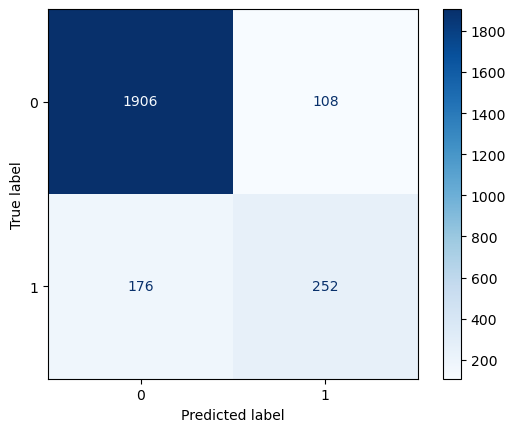

In [40]:
evaluar_modelo(voting_model_soft, test_data, test_labels_encoded)


--- Evaluación del Modelo ---
Accuracy:   0.8849
Precision:  0.7070
Recall:     0.5864
F1 Score:   0.6411
ROC AUC:    0.7674
TN: 1910, FP: 104, FN: 177, TP: 251

Reporte de Indicadores:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2014
           1       0.71      0.59      0.64       428

    accuracy                           0.88      2442
   macro avg       0.81      0.77      0.79      2442
weighted avg       0.88      0.88      0.88      2442



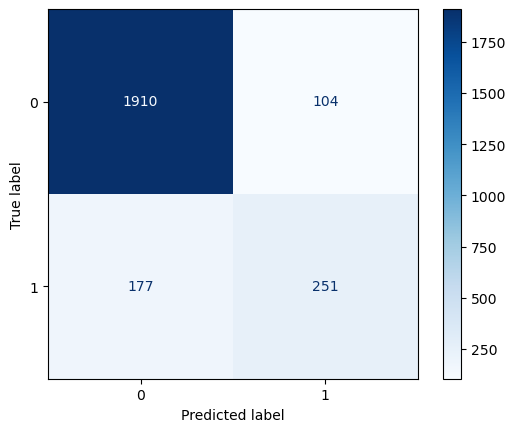

In [41]:
evaluar_modelo(voting_model_hard, test_data, test_labels_encoded)

#### 3. Clustering + Decision Tree

In [42]:
from sklearn.cluster import KMeans

with mlflow.start_run(run_name="Clustering + Decision Tree"):
    ## Aplicación kmeans
    kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
    train_clusters = kmeans.fit_predict(train_data)
    train_data_clustered = np.column_stack((train_data, train_clusters))
    test_clusters = kmeans.predict(test_data)
    test_data_clustered = np.column_stack((test_data, test_clusters))
    mlflow.log_params({"n_clusters": 5, "random_state": 42, "n_init": 10})



    ## DT + Clustering
    dt_cluster = DecisionTreeClassifier(max_depth=5,criterion='entropy', min_samples_split=10, random_state=42)
    dt_cluster.fit(train_data_clustered, train_labels_encoded)
    predictions_test = dt_cluster.predict(test_data_clustered)
    accuracy = accuracy_score(test_labels_encoded, predictions_test)
    class_report = classification_report(test_labels_encoded, predictions_test)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_text(class_report, "classification_report.txt")
    mlflow.sklearn.log_model(dt_cluster, "Decision Tree with Clustering")

    print(f"Accuracy del Árbol de Decisión con Clustering: {accuracy:.4f}")
    print("Reporte de Clasificación:\n", class_report)


2025/02/18 22:42:50 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2025/02/18 22:42:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy del Árbol de Decisión con Clustering: 0.8849
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2014
           1       0.69      0.62      0.66       428

    accuracy                           0.88      2442
   macro avg       0.81      0.78      0.79      2442
weighted avg       0.88      0.88      0.88      2442



Moroso           0          1
Cluster                      
0        83.253914  16.746086
1        80.000000  20.000000
2        73.943662  26.056338
3        82.153846  17.846154
4        83.419689  16.580311


<Figure size 1000x500 with 0 Axes>

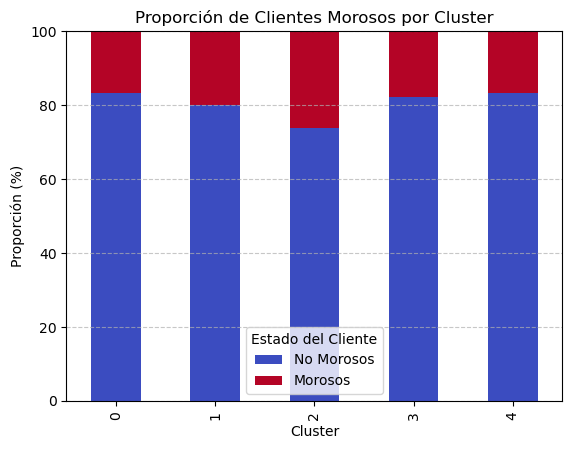

In [43]:
data_clusters = pd.DataFrame({'Cluster': train_clusters, 'Moroso': train_labels_encoded})
cluster_morosos = data_clusters.groupby("Cluster")["Moroso"].value_counts().unstack()
cluster_morosos_perc = cluster_morosos.div(cluster_morosos.sum(axis=1), axis=0) * 100
print(cluster_morosos_perc)


plt.figure(figsize=(10, 5))
cluster_morosos_perc.plot(kind='bar', stacked=True, cmap="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Proporción (%)")
plt.title("Proporción de Clientes Morosos por Cluster")
plt.legend(["No Morosos", "Morosos"], title="Estado del Cliente")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

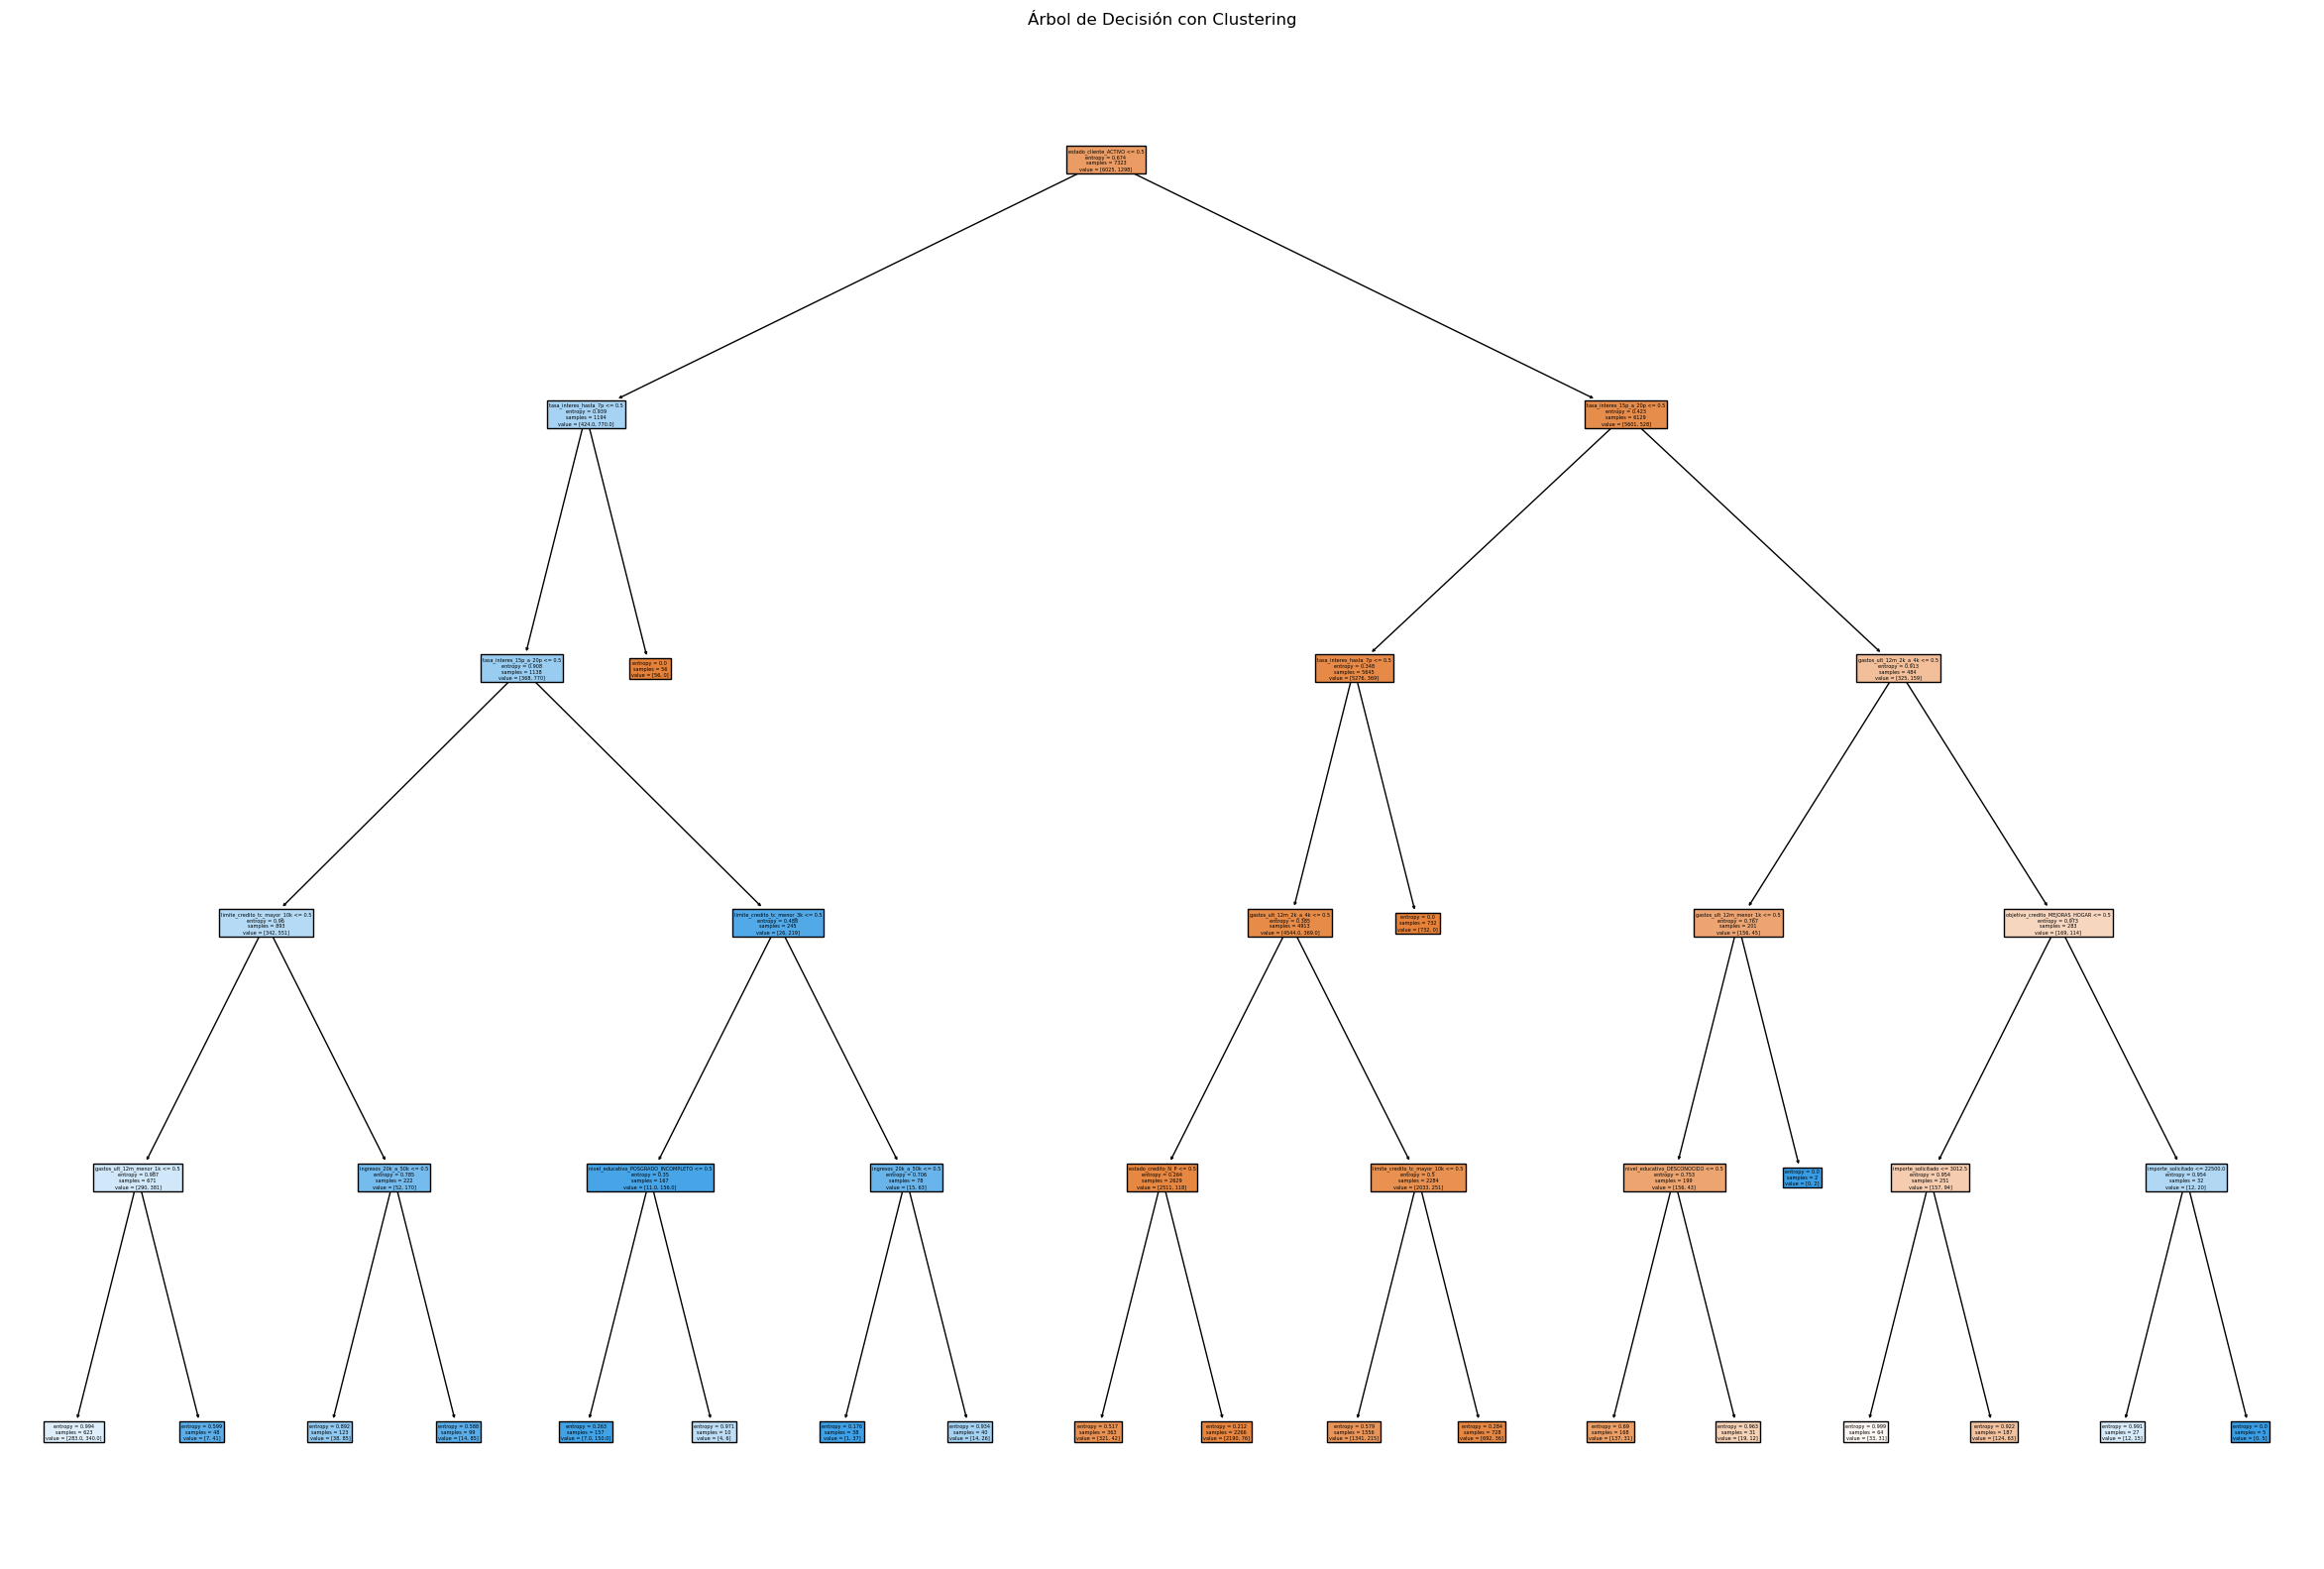

In [44]:
plt.figure(figsize=(30,20))
plot_tree(dt_cluster, filled=True, feature_names=list(train_data.columns) + ['Cluster'])
plt.title("Árbol de Decisión con Clustering")
plt.show()

In [45]:
from sklearn.tree import export_text

## Impresion de reglas (arbol) para mejor visualización
tree_rules = export_text(dt_cluster, feature_names=list(train_data.columns) +['Cluster'])
print(tree_rules)

|--- estado_cliente_ACTIVO <= 0.50
|   |--- tasa_interes_hasta_7p <= 0.50
|   |   |--- tasa_interes_15p_a_20p <= 0.50
|   |   |   |--- limite_credito_tc_mayor_10k <= 0.50
|   |   |   |   |--- gastos_ult_12m_menor_1k <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gastos_ult_12m_menor_1k >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- limite_credito_tc_mayor_10k >  0.50
|   |   |   |   |--- ingresos_20k_a_50k <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ingresos_20k_a_50k >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- tasa_interes_15p_a_20p >  0.50
|   |   |   |--- limite_credito_tc_menor_3k <= 0.50
|   |   |   |   |--- nivel_educativo_POSGRADO_INCOMPLETO <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- nivel_educativo_POSGRADO_INCOMPLETO >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- limite_credito_tc_menor_3k >  0.50
|   |   |   |   |--- ingresos_20k_a_50k <= 0.50
|   |   |   |   |   |--- class: 1
|   |   | 

In [46]:
## Análisis de Importanci de Características 
feature_importance = pd.DataFrame({
    'Feature': list(train_data.columns) + ['Cluster'],
    'Importance': dt_cluster.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [47]:
feature_importance

,Feature,Importance
49,estado_cliente_ACTIVO,0.662893
16,tasa_interes_15p_a_20p,0.132109
18,tasa_interes_hasta_7p,0.089110
3,gastos_ult_12m_2k_a_4k,0.036335
11,limite_credito_tc_mayor_10k,0.029161
48,estado_credito_N_P,0.014707
8,gastos_ult_12m_menor_1k,0.010021
20,ingresos_20k_a_50k,0.009501
55,nivel_educativo_POSGRADO_INCOMPLETO,0.004082
0,importe_solicitado,0.003760
